In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
class Node:
    def __init__(self, rank = None, sing_val = None, U = None, V = None, size_ = None):
        self.rank, self.sing_val, self.U, self.V, self.size_ = rank, sing_val, U, V, size_
        self.sons = []

In [3]:
def CompressMatrix(A, t_min, t_max, s_min, s_max, U, D, V, r):
    selected_matrix = A[t_min:t_max+1, s_min:s_max+1]
    if( np.allclose(selected_matrix, np.zeros_like(selected_matrix))) :
        v = Node(0, np.array([]), np.array([]), np.array([]), (t_min, t_max, s_min, s_max) )
        return v
    sigma_ = np.diag(D)
    u = Node()
    u.rank = r
    u.sing_val = sigma_[:u.rank]
    u.U = U[:, :u.rank]
    u.V = np.matmul(D[:u.rank, :u.rank], V[:u.rank, :])
    u.size_ = (t_min, t_max, s_min, s_max)
    return u

In [4]:
def CreateTree(A, t_min, t_max, s_min, s_max, r, epsi):
    U, D, V = np.linalg.svd(A[t_min:t_max+1, s_min:s_max+1])
    D_new = np.zeros((D.shape[0], D.shape[0]))
    np.fill_diagonal(D_new, D)
    if(r+1 >= D_new.shape[0] or r+1 >= D_new.shape[1] or D_new[r+1, r+1] < epsi):
        v = CompressMatrix(A, t_min, t_max, s_min, s_max, U, D_new, V, r)
        return v
    v = Node()
    t_newmax = (t_min + t_max)//2
    s_newmax = (s_min + s_max)//2
    v.sons.append(CreateTree(A, t_min, t_newmax, s_min, s_newmax, r, epsi))
    v.sons.append(CreateTree(A, t_min, t_newmax, s_newmax+1, s_max, r, epsi))
    v.sons.append(CreateTree(A, t_newmax+1, t_max, s_min, s_newmax, r, epsi))
    v.sons.append(CreateTree(A, t_newmax+1, t_max, s_newmax + 1, s_max, r, epsi))
    return v

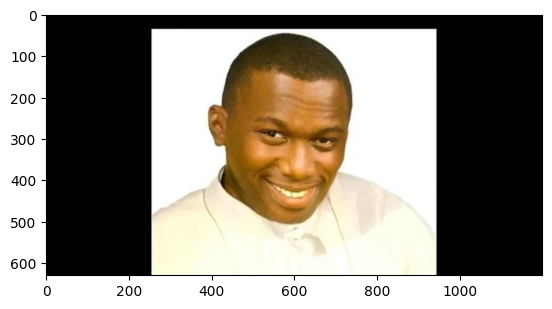

In [ ]:
import cv2
Img = cv2.imread("black_man.jpg")
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
plt.imshow(Img)

In [6]:
r_img = Img[..., 0]
g_img = Img[..., 1]
b_img = Img[..., 2]



In [7]:
compress_jp2_r = CreateTree(r_img, 0, r_img.shape[0], 0, r_img.shape[1], 4, 1e-3)
compress_jp2_g = CreateTree(g_img, 0, g_img.shape[0], 0, g_img.shape[1], 4, 1e-3)
compress_jp2_b = CreateTree(b_img, 0, b_img.shape[0], 0, b_img.shape[1], 4, 1e-3)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)